In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
import astropy
import vaex as vx
from matplotlib import pyplot as plt
from detanalysis import Analyzer
import qetpy as qp
from detprocess import Template
from detprocess import Noise
import pytesdaq.io as h5io
from glob import glob

import warnings
warnings.filterwarnings('ignore')
from pytesdaq.io.hdf5 import H5Reader
from matplotlib.gridspec import GridSpec

#fft stuff
from scipy.fftpack import fft, ifft, fftfreq
from IPython.display import IFrame
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3.50

In [2]:
IFrame("of_1xnxn_demo_files/Polarity_constrain.pdf", width=1000, height=500)

In [3]:
#Lets call the 1x2x2 

fs=1250000


#We will use this function to instantiate the OF 1x2
def Call_optimal_Filter_object(template_1,template_1_tag, template_2, template_2_tag,  psd ,channel_name, fs, pretrigger_samples, fit_window):
    # instantiate OF1x2
    return qp.OF1x2(of_base=None, template_1_tag=template_1_tag, template_1=template_1,
                template_2_tag=template_2_tag, template_2=template_2, psd=psd, sample_rate=fs,
                 pretrigger_samples=pretrigger_samples, channel= channel_name, fit_window= fit_window)


    





In [4]:
#lets load all the template and noise matrix; in this case i am using the uncorelated noise for both the channels as I would be fitting these 
#filters separately 


template_dict = np.load('of_1xnxn_demo_files/template_dict.npy',allow_pickle=True)

#lets put the template into a numpy arary for easy of handling
CPD1_scintillation= template_dict.item()['CPD1_scintillation']
CPD1_evaporation= template_dict.item()['CPD1_evaporation']
CPD1_triplet= template_dict.item()['CPD1_triplet']

CPD2_scintillation = template_dict.item()['CPD2_scintillation']
CPD2_evaporation = template_dict.item()['CPD2_evaporation']
CPD2_triplet= template_dict.item()['CPD2_triplet']
t=template_dict.item()['time']

Noise_dict = np.load('of_1xnxn_demo_files/Noise_dict.npy',allow_pickle=True)

psd_CPD1 = Noise_dict.item()['noise_uncorelated_CPD1']
psd_CPD2 = Noise_dict.item()['noise_uncorelated_CPD2']
freq_array = Noise_dict.item()['noise_frequecy']



In [7]:
#Now lets load some traces; i wouldn't find many traces(with negative fits) on the day I was writing this demo 
traces= np.load('of_1xnxn_demo_files/traces_polarity.npy')

In [9]:
OF_1x2_CPD1 = Call_optimal_Filter_object(CPD1_scintillation,'CPD1_scintillation', CPD1_evaporation,'CPD1_evaporation',
                                           psd_CPD1,'CPD1', fs, 2500,  fit_window = [[-625,625],[-65,625]])
    
OF_1x2_CPD2 = Call_optimal_Filter_object(CPD2_scintillation,'CPD2_scintillation', CPD2_evaporation,'CPD2_evaporation',
                                           psd_CPD2,'CPD2', fs, 2500,  fit_window = [[-625,625],[-65,625]])


INFO: Adding template 1 and 2 to OF base object!
INFO: Adding noise PSD to OF base object
INFO: Adding template 1 and 2 to OF base object!
INFO: Adding noise PSD to OF base object


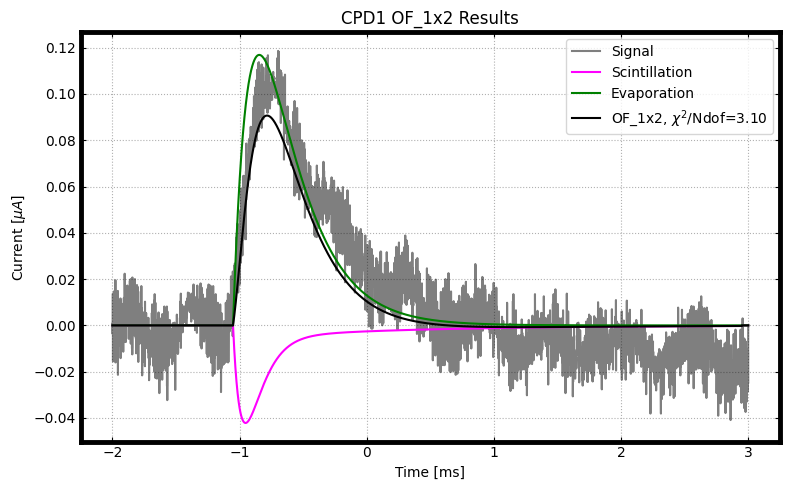

In [10]:
n=0
OF_1x2_CPD1._of_base.clear_signal()
#OF_1x2_CPD1.calc(signal =traces[n][0][:],fit_window = [[-625,625],[-625,1250]] )
OF_1x2_CPD1.calc(signal =traces[n][0][:])
OF_1x2_CPD1.plot()

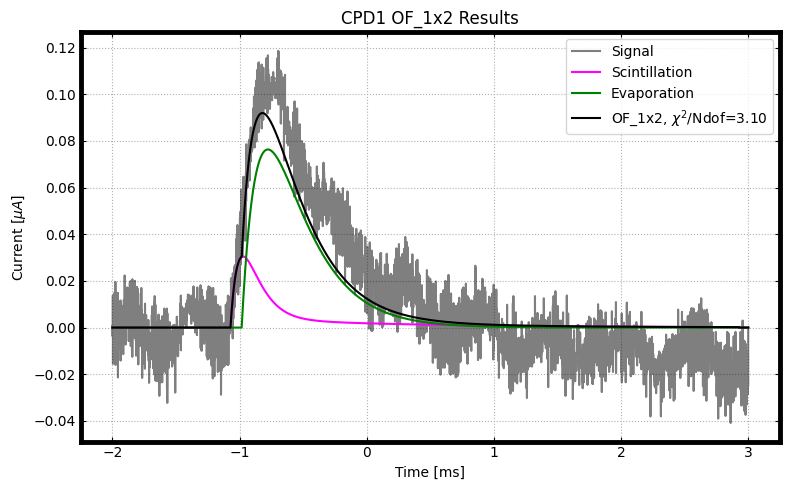

In [11]:
#next lets try to constrain the polarity of both these fits; for 1x2x2 there exist a simple method called teh easy method, that doesnot 
# dela with all the geomtrical things that needs to be 
n=0
OF_1x2_CPD1._of_base.clear_signal()
OF_1x2_CPD1.calc(signal =traces[n][0][:] ,flag_polarity_constraints = True,method = 'easy')
OF_1x2_CPD1.plot()

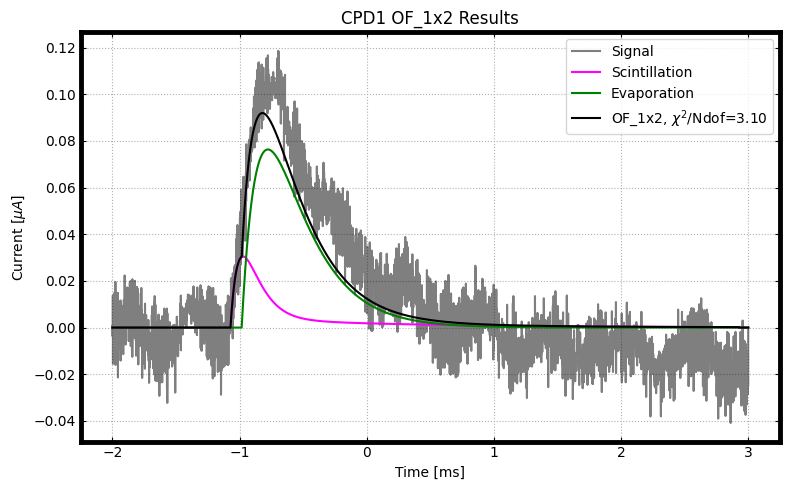

In [12]:
#next lets try to constrain the polarity of both these fits using another method called "hard"; where we have to perform all teh geometrical 
#stuff and in the you will end up with a polarity constrained amplitude

n=0
OF_1x2_CPD1._of_base.clear_signal()
OF_1x2_CPD1.calc(signal =traces[n][0][:] ,flag_polarity_constraints = True,method = 'hard')
OF_1x2_CPD1.plot()